In [1]:
df <- read.table("housing.data", header = FALSE)
colnames(df) <- c("crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b", "lstat", "medv")
head(df)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [12]:
fit <- lm(medv ~ ., data=df)

In [3]:
rd <- abs(rstandard(fit))
srd <- rd[order(-rd)]
head(srd)

369      372      373      370      413      365 
5.713855 5.335291 5.180330 3.756430 3.505841 3.420118

In [4]:
hv <- hatvalues(fit)
shv <- hv[order(-hv)]
head(shv)

381        419        406        411        366        156 
0.30595949 0.19010096 0.15643251 0.12470699 0.09851493 0.08527666

In [5]:
cd <- cooks.distance(fit)
scd <- cd[order(-cd)]
head(scd)

369        373        365        366        370        413 
0.16567369 0.09409651 0.06942966 0.06718425 0.05526255 0.05004117

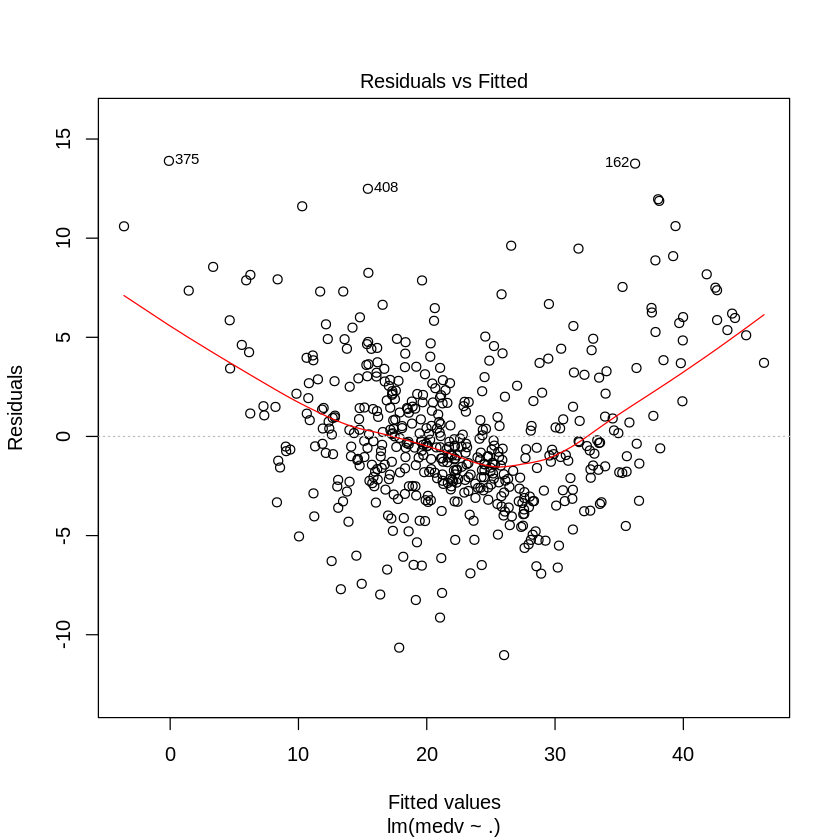

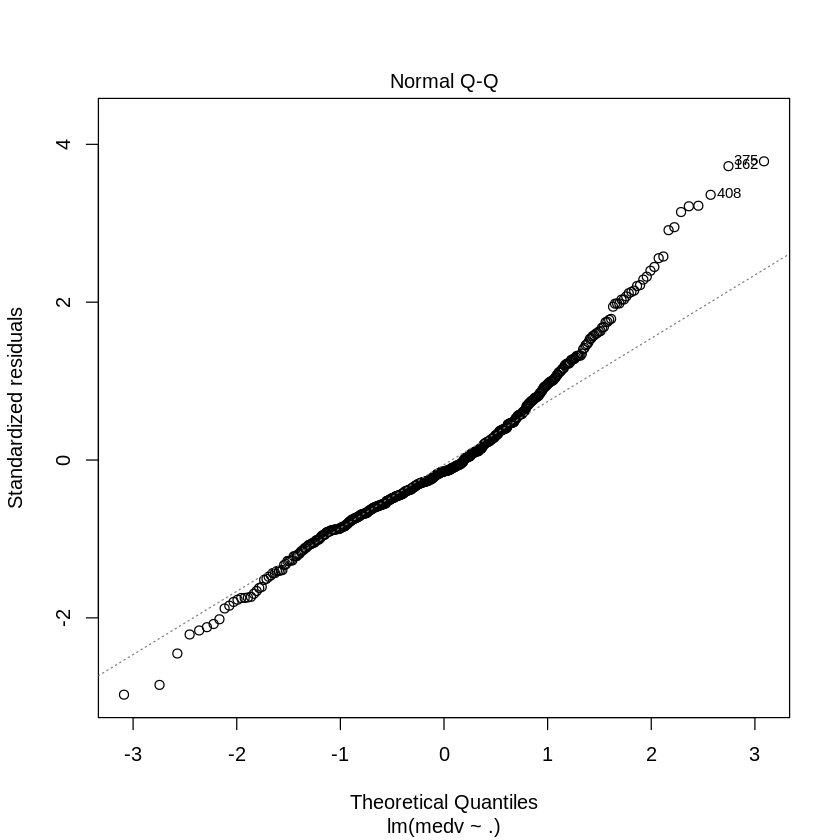

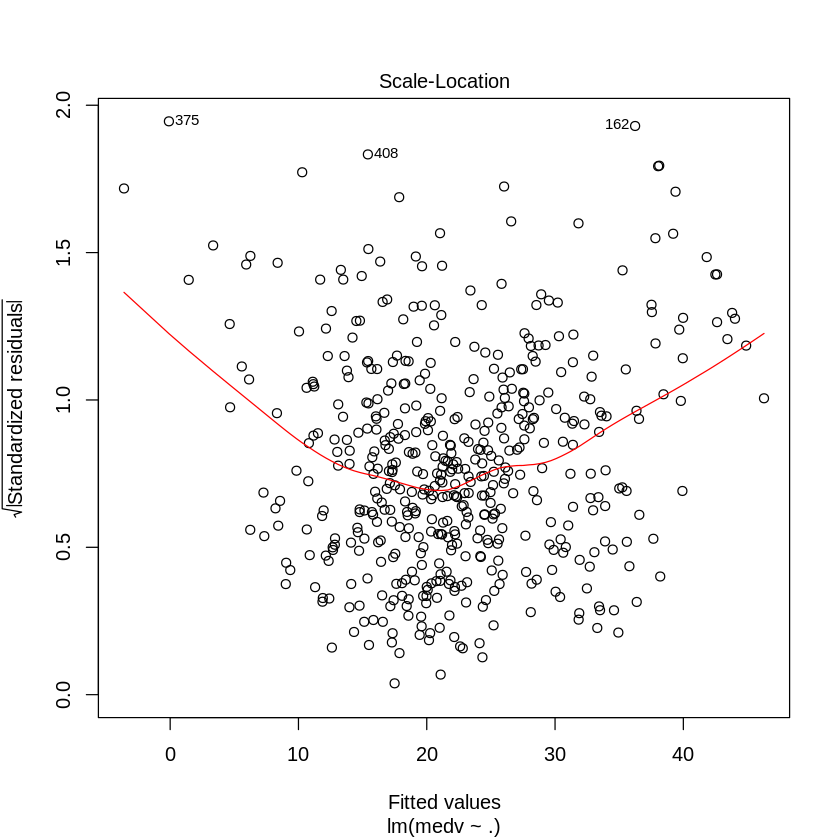

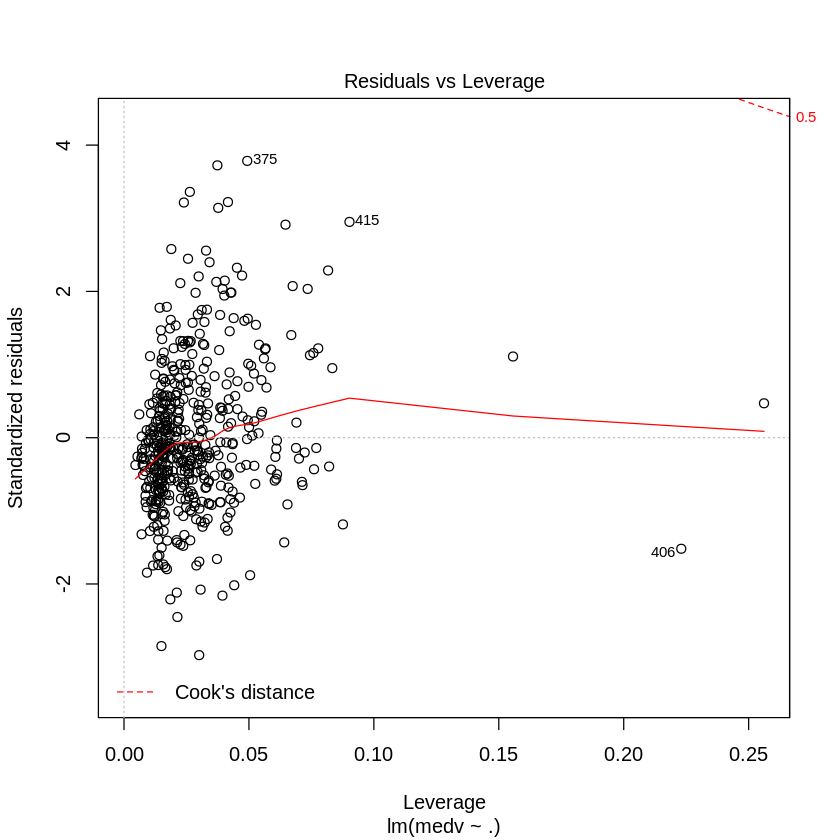

In [6]:
trimmed <- df[-c(369, 372, 373, 370, 366, 368, 371, 413, 365, 381), ]
model <- lm(medv ~ ., data=trimmed)
plot(model)

In [7]:
library(MASS)

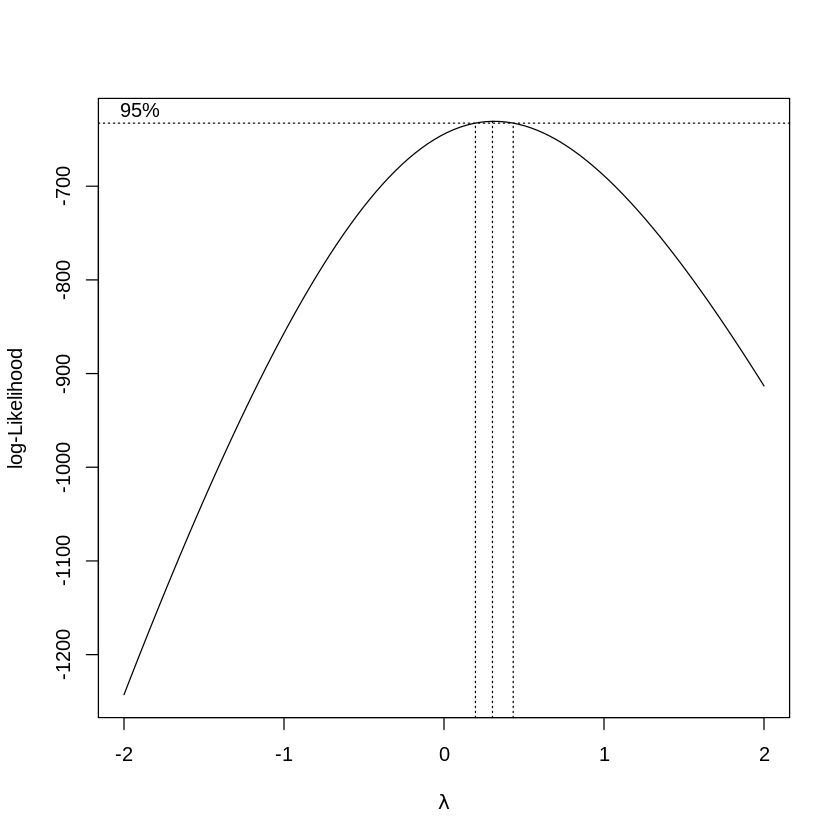

In [8]:
bc <- boxcox(model)

In [9]:
lambda <- bc$x[which.max(bc$y)]
lambda

[1] 0.3030303

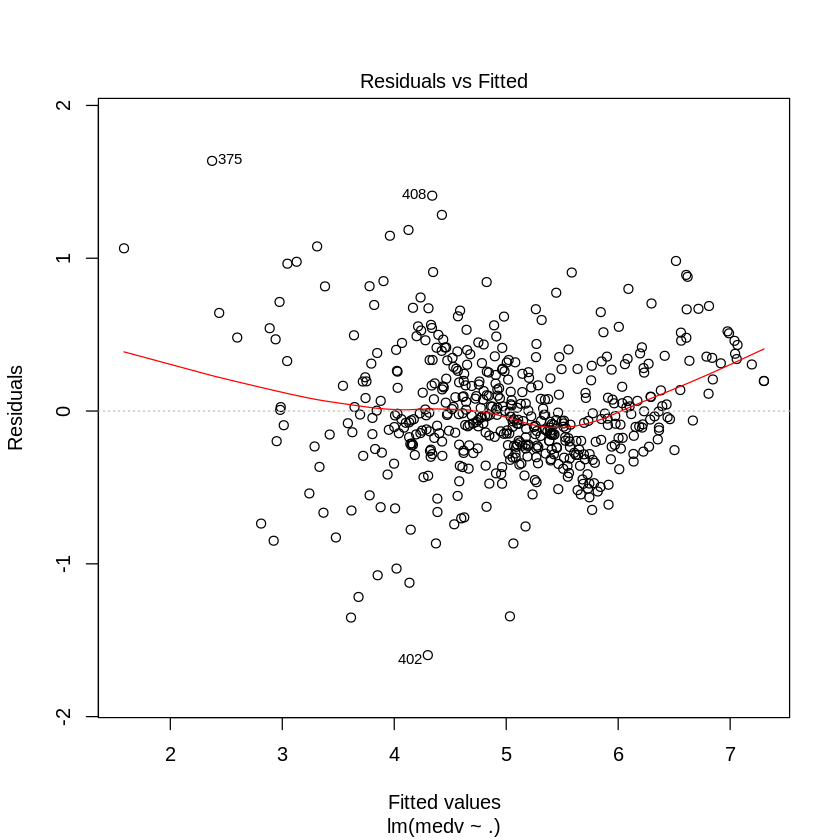

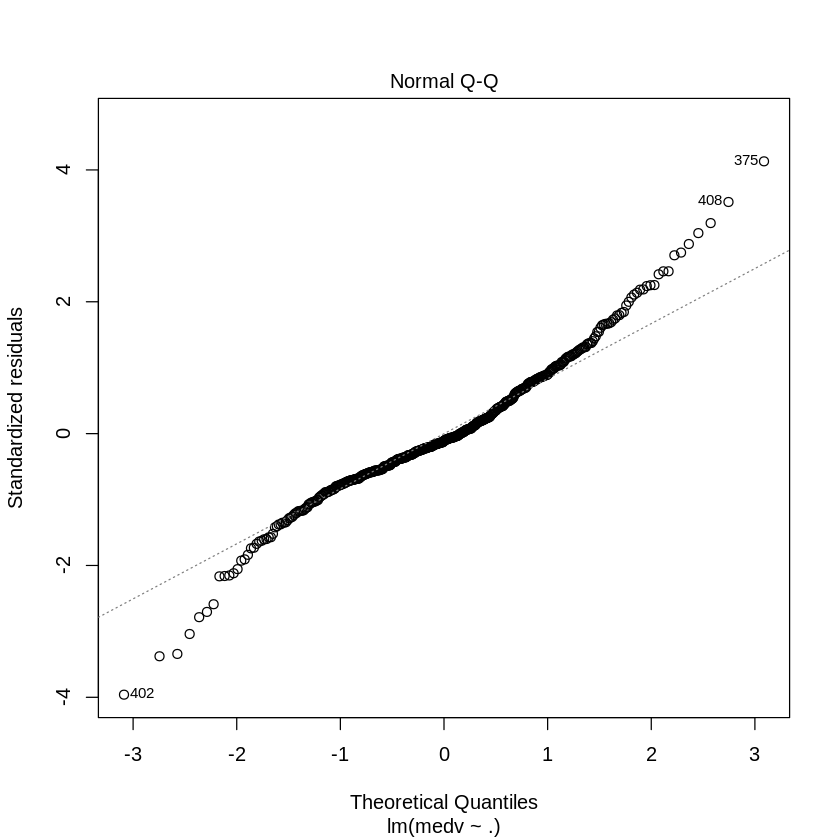

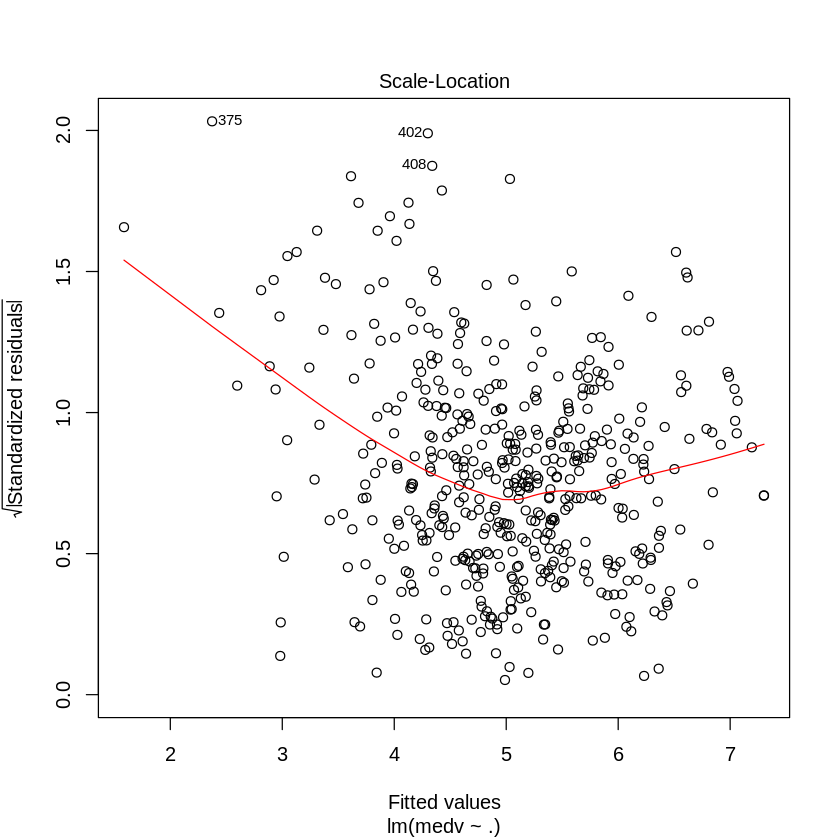

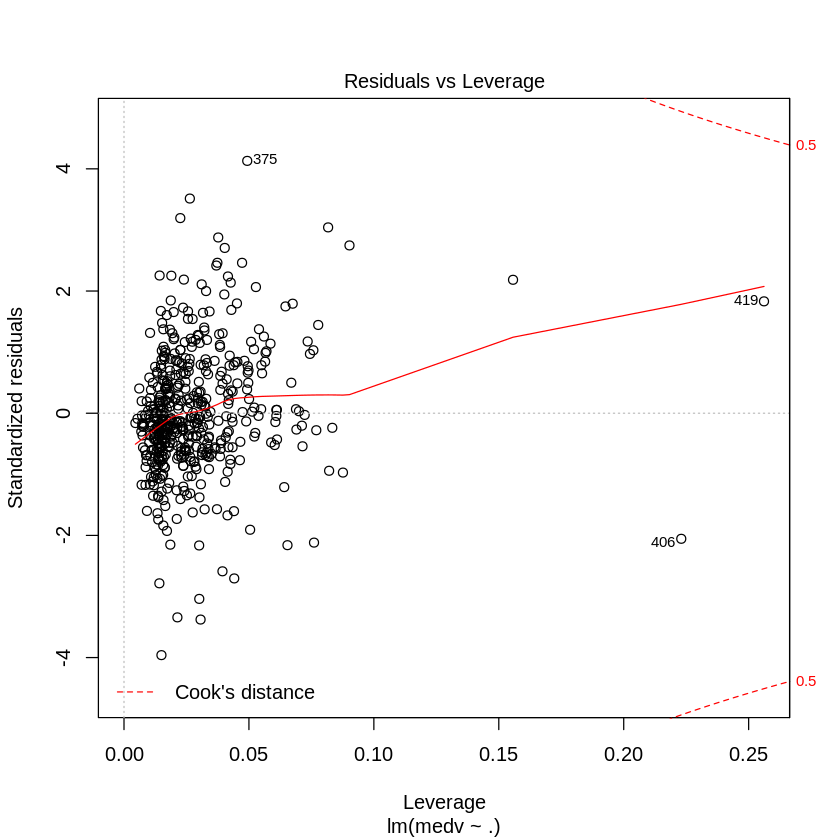

In [13]:
transformed <-transform(trimmed, medv = (medv^(lambda) - 1)/lambda)
model_t <- lm(medv ~ ., data=transformed)
plot(model_t)

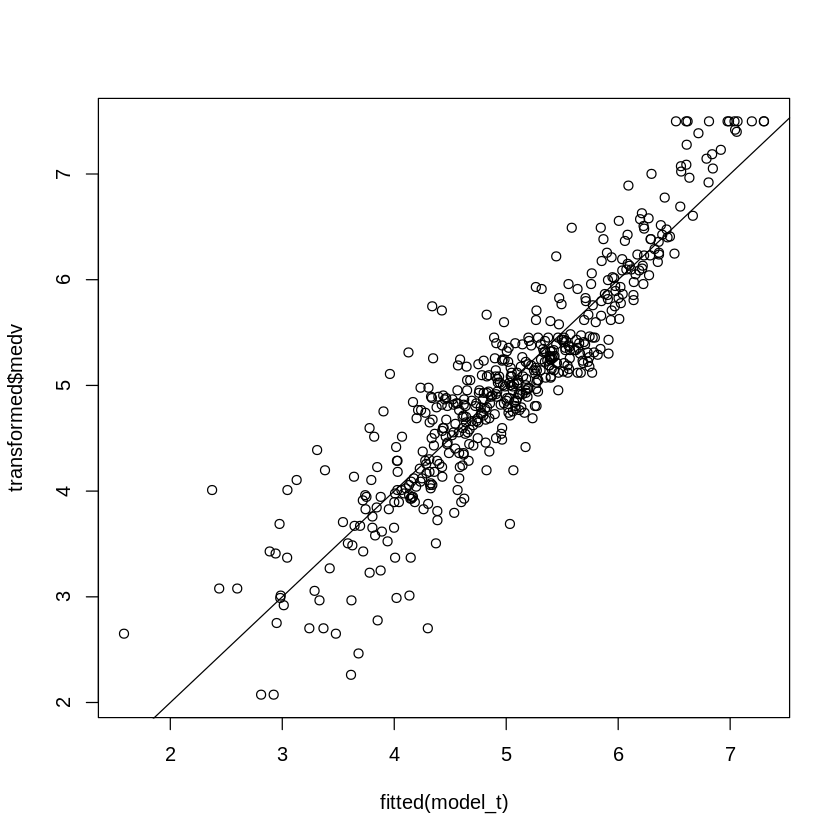

In [16]:
plot(fitted(model_t), transformed$medv)
abline(a=0, b=1)